In [ ]:
!pip install osmnx.

In [3]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import osmnx as ox
import geopy as gpy
from IPython.display import Image
from geopy.geocoders import Nominatim
import regex as re
%matplotlib inline
ox.__version__

'1.2.2'

C:\Users\psle1\anaconda3\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


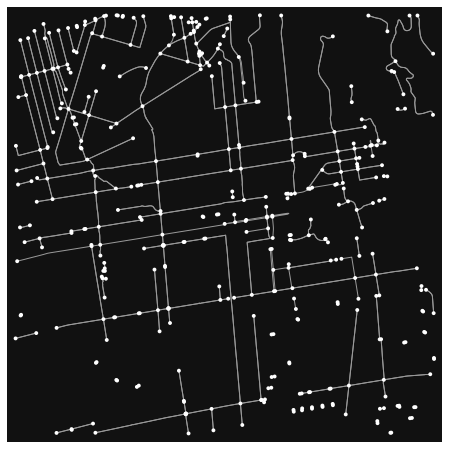

In [47]:
import osmnx as ox
useful_tags = ox.settings.useful_tags_way + ['cycleway']
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
coords = (37.8715, -122.2730)
G = ox.graph_from_point(coords, dist=2000, network_type='bike', simplify=False)
non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
G.remove_edges_from(non_cycleways)
G = ox.utils_graph.remove_isolated_nodes(G)
G = ox.simplify_graph(G)
nodes, edges = ox.graph_to_gdfs(G)
fig, ax = ox.plot_graph(G)

In [2]:
dict_dense_cities = {'friendship_village': (38.9625, -77.090278),
                    'bellerose_terrace': (40.721389, -73.723889),
                    'walnut_park': (33.968889, -118.223889),
                    'loch_lomond': (26.271944, -80.129722),
                    'ewa_gentry': (21.339444, -158.029722),
                    'rollingwood': (37.965278, -122.33),
                    'isla_vista': (34.413333, -119.860833),
                    'east_los_angeles': (34.033333, -118.166667),
                    }

In [49]:
center_point = (37.8715, -122.2730)
tags = {'amenity':True, 'landuse':['retail','commercial'], 'highway':'bus_stop'}
G = ox.geometries_from_point(center_point, tags, dist=1000)
G

name  \
element_type osmid                                      
node         234653692    Genetics Underground Garage   
             271109408                            NaN   
             282601069            Triple Rock Brewery   
             282872710                            NaN   
             286081226  Berkeley Dog and Cat Hospital   
...                                               ...   
relation     4183940               Berkeley City Club   
             8648606                  Zaytuna College   
             9387378    Sutter Urgent Care - Berkeley   
             14404772            Berkeley High School   
             14886206    Washington Elementary School   

                                                                 geometry  \
element_type osmid                                                          
node         234653692                        POINT (-122.26521 37.87350)   
             271109408                        POINT (-122.26440 37.87755)   
             282601069                        POINT (-122.26875 37.87342)   
             282872710                        POINT (-122.26541 37.87380)   
             286081226                        POINT (-122.26620 37.86491)   
...                                                                   ...   
relation     4183940    POLYGON ((-122.26280 37.86780, -122.26281 37.8...   
             8648606    MULTIPOLYGON (((-122.26255 37.87724, -122.2621...   
             9387378    MULTIPOLYGON (((-122.26994 37.86357, -122.2698...   
             14404772   MULTIPOLYGON (((-122.27257 37.86871, -122.2707...   
             14886206   MULTIPOLYGON (((-122.27373 37.86633, -122.2736...   

                       highway          amenity layer      parking access  \
element_type osmid                                                          
node         234653692     NaN          parking    -1  underground    NaN   
             271109408     NaN         post_box   NaN          NaN    NaN   
             282601069     NaN              pub   NaN          NaN    NaN   
             282872710     NaN  bicycle_parking   NaN          NaN    NaN   
             286081226     NaN       veterinary   NaN          NaN    NaN   
...                        ...              ...   ...          ...    ...   
relation     4183940       NaN    social_centre   NaN          NaN    NaN   
             8648606       NaN       university   NaN          NaN    NaN   
             9387378       NaN         hospital   NaN          NaN    NaN   
             14404772      NaN           school   NaN          NaN    NaN   
             14886206      NaN           school   NaN          NaN    NaN   

                       barrier addr:city addr:country  ... leisure theatre  \
element_type osmid                                     ...                   
node         234653692     NaN       NaN          NaN  ...     NaN     NaN   
             271109408     NaN       NaN          NaN  ...     NaN     NaN   
             282601069     NaN  Berkeley           US  ...     NaN     NaN   
             282872710     NaN       NaN          NaN  ...     NaN     NaN   
             286081226     NaN       NaN          NaN  ...     NaN     NaN   
...                        ...       ...          ...  ...     ...     ...   
relation     4183940       NaN       NaN          NaN  ...     NaN     NaN   
             8648606       NaN       NaN          NaN  ...     NaN     NaN   
             9387378       NaN  Berkeley          NaN  ...     NaN     NaN   
             14404772      NaN  Berkeley          NaN  ...     NaN     NaN   
             14886206      NaN  Berkeley          NaN  ...     NaN     NaN   

                       wifi                               ways name:de  \
element_type osmid                                                       
node         234653692  NaN                                NaN     NaN   
             271109408  NaN                                NaN    

## Getting stats of dense cities

In [2]:
dict_dense_cities = {'friendship_village': (38.9625, -77.090278),
                    'bellerose_terrace': (40.721389, -73.723889),
                    'walnut_park': (33.968889, -118.223889),
                    'loch_lomond': (26.271944, -80.129722),
                    'ewa_gentry': (21.339444, -158.029722),
                    'rollingwood': (37.965278, -122.33),
                    'isla_vista': (34.413333, -119.860833),
                    'east_los_angeles': (34.033333, -118.166667),
                    }

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\psle1\anaconda3\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


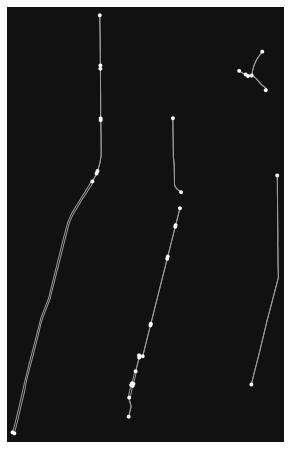

In [69]:
import osmnx as ox
useful_tags = ox.settings.useful_tags_way + ['cycleway']
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
coords = (34.033333, -118.166667)
G = ox.graph_from_point(coords, dist=2000, network_type='bike', simplify=False)
nodes, edges = ox.graph_to_gdfs(G)
stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
stats = ox.basic_stats(stats)

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]
del stats["self_loop_proportion"]

df_og = pd.DataFrame(pd.Series(stats, name="value")).round(3)

non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
G.remove_edges_from(non_cycleways)
G = ox.utils_graph.remove_isolated_nodes(G)
G = ox.simplify_graph(G)
nodes, edges = ox.graph_to_gdfs(G)
fig, ax = ox.plot_graph(G)


stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
stats = ox.basic_stats(stats)

del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]
del stats["self_loop_proportion"]

# load as a pandas dataframe
df_bike = pd.DataFrame(pd.Series(stats, name="value")).round(3)

df_bike_ratio = pd.DataFrame()

df_bike_ratio['insert_city'] = (df_bike.value/df_og.value)

In [ ]:
df_bike_ratio

In [30]:
def tract_stats(dict_tract):
    df_stats = pd.DataFrame()
    for city in dict_tract:
        coords = (dict_tract[city])

        useful_tags = ox.settings.useful_tags_way + ['cycleway']
        ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
        coords = (34.033333, -118.166667)
        G = ox.graph_from_point(coords, dist=2000, network_type='bike', simplify=False)
        nodes, edges = ox.graph_to_gdfs(G)
        stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
        stats = ox.basic_stats(stats)

        # delete the no longer needed dict elements
        del stats["streets_per_node_counts"]
        del stats["streets_per_node_proportions"]
        del stats["self_loop_proportion"]

        df_og = pd.DataFrame(pd.Series(stats, name="value")).round(3)

        non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
        G.remove_edges_from(non_cycleways)
        G = ox.utils_graph.remove_isolated_nodes(G)
        G = ox.simplify_graph(G)
        nodes, edges = ox.graph_to_gdfs(G)
        fig, ax = ox.plot_graph(G)


        stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
        stats = ox.basic_stats(stats)

        del stats["streets_per_node_counts"]
        del stats["streets_per_node_proportions"]
        del stats["self_loop_proportion"]

        # load as a pandas dataframe
        df_bike = pd.DataFrame(pd.Series(stats, name="value")).round(3)

        df_bike_ratio = pd.DataFrame()

        df_bike_ratio['insert_city'] = (df_bike.value/df_og.value)
    return df_stats

model_city_stats = tract_stats(dict_dense_cities)


C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Generating network statistics for model cities

### Let's transpose it first for our sanity

In [32]:
model_city_stats = model_city_stats.transpose()

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Clean up some of the columns we don't need
- Intersection counts <br>
- Rename n and m 

In [44]:
model_city_stats = model_city_stats.iloc[:,:12]
model_city_stats = model_city_stats.rename(columns = {"n":"node","m":"edges"})

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Add the following columns of stats
- alpha index <br>
- gamma index <br>


In [51]:
model_city_stats['beta'] = model_city_stats['edges']/model_city_stats['node']
model_city_stats['gamma'] = model_city_stats['edges']/(3*(model_city_stats['node']-2))
model_city_stats

,node,edges,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,beta,gamma
friendship_village,1340.0,3587.0,5.354,244275.200,68.100,3.004,1198.0,129985.544,1948.0,66.728,1.056,0.007,2.676866,0.893622
bellerose_terrace,750.0,1863.0,4.968,149287.518,80.133,3.092,668.0,87713.257,1101.0,79.667,1.023,0.001,2.484000,0.830214
walnut_park,1271.0,3308.0,5.205,247872.199,74.931,2.910,1116.0,129753.314,1773.0,73.183,1.033,0.003,2.602675,0.868926
loch_lomond,688.0,1690.0,4.913,110011.806,65.096,2.814,582.0,62037.753,939.0,66.068,1.145,0.006,2.456395,0.821186
ewa_gentry,470.0,979.0,4.166,93250.301,95.251,2.440,312.0,52712.986,535.0,98.529,1.066,0.002,2.082979,0.697293
rollingwood,1253.0,2920.0,4.661,170305.732,58.324,2.808,1042.0,96882.460,1715.0,56.491,1.111,0.008,2.330407,0.778044
isla_vista,2114.0,4696.0,4.443,167193.499,35.603,2.351,1359.0,89866.441,2474.0,36.324,1.087,0.006,2.221381,0.741162
east_los_angeles,1113.0,2852.0,5.125,217801.448,76.368,2.868,918.0,118016.756,1525.0,77.388,1.042,0.003,2.562444,0.855686


In [53]:
model_city_stats.transpose()

,friendship_village,bellerose_terrace,walnut_park,loch_lomond,ewa_gentry,rollingwood,isla_vista,east_los_angeles
node,1340.000000,750.000000,1271.000000,688.000000,470.000000,1253.000000,2114.000000,1113.000000
edges,3587.000000,1863.000000,3308.000000,1690.000000,979.000000,2920.000000,4696.000000,2852.000000
k_avg,5.354000,4.968000,5.205000,4.913000,4.166000,4.661000,4.443000,5.125000
edge_length_total,244275.200000,149287.518000,247872.199000,110011.806000,93250.301000,170305.732000,167193.499000,217801.448000
edge_length_avg,68.100000,80.133000,74.931000,65.096000,95.251000,58.324000,35.603000,76.368000
streets_per_node_avg,3.004000,3.092000,2.910000,2.814000,2.440000,2.808000,2.351000,2.868000
intersection_count,1198.000000,668.000000,1116.000000,582.000000,312.000000,1042.000000,1359.000000,918.000000
street_length_total,129985.544000,87713.257000,129753.314000,62037.753000,52712.986000,96882.460000,89866.441000,118016.756000
street_segment_count,1948.000000,1101.000000,1773.000000,939.000000,535.000000,1715.000000,2474.000000,1525.000000
street_length_avg,66.728000,79.667000,73.183000,66.068000,98.529000,56.491000,36.324000,77.388000


In [71]:
data = pd.read_csv('low_income_tracts_centroid.csv')

data_sample = data.sample(15, random_state=42)
data_sample['tract_name'] = data_sample.tract_name.str.replace(r'(,\s[C].*)', r'')

data_sample

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-57a3f0761cd2>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_sample['tract_name'] = data_sample.tract_name.str.replace(r'(,\s[C].*)', r'')


,latitudes,longitudes,median_income,GEOID,agg_travel_time_min,workers_who_commute,total_pop,tract_name
2834,34.108410,-118.321281,54265.0,6037189500,67505.0,2158.0,4180.0,"Census Tract 1895, Los Angeles County"
2552,34.154963,-118.127003,57898.0,6037462301,75885.0,2644.0,5265.0,"Census Tract 4623.01, Los Angeles County"
805,36.746818,-119.763430,31982.0,6019002601,30110.0,1633.0,4971.0,"Census Tract 26.01, Fresno County"
3048,33.892206,-117.472409,84286.0,6065041404,56270.0,1870.0,3927.0,"Census Tract 414.04, Riverside County"
1732,34.095060,-118.217063,64623.0,6037185202,60850.0,1802.0,3627.0,"Census Tract 1852.02, Los Angeles County"
220,38.555551,-121.360634,83620.0,6067009109,66240.0,2330.0,5006.0,"Census Tract 91.09, Sacramento County"
256,38.517184,-121.447188,41047.0,6067004601,83460.0,3030.0,8155.0,"Census Tract 46.01, Sacramento County"
211,38.616393,-121.422280,37031.0,6067006202,34165.0,1344.0,3644.0,"Census Tract 62.02, Sacramento County"
3464,32.990295,-115.522375,27523.0,6025010400,61315.0,1680.0,7303.0,"Census Tract 104, Imperial County"
746,37.734490,-122.384490,37981.0,6075023102,63755.0,1811.0,4549.0,"Census Tract 231.02, San Francisco County"


In [72]:
data_sample_dict = data_sample.to_dict(orient = 'records')

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
data_stats_df = pd.DataFrame()


for entry in data_sample_dict:
    lat = entry['latitudes']
    lon = entry['longitudes']
    name = entry['tract_name']
    coords = (lat,lon)
    
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)

    G = ox.graph_from_point(coords, dist=2000, network_type='bike', simplify=False)
    nodes, edges = ox.graph_to_gdfs(G)
    
    stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
    stats = ox.basic_stats(stats)

    # delete the no longer needed dict elements
    del stats["streets_per_node_counts"]
    del stats["streets_per_node_proportions"]
    del stats["self_loop_proportion"]

    df_og = pd.DataFrame(pd.Series(stats, name="value")).round(3)

    non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
    G.remove_edges_from(non_cycleways)
    G = ox.utils_graph.remove_isolated_nodes(G)
    G = ox.simplify_graph(G)
    nodes, edges = ox.graph_to_gdfs(G)
#     fig, ax = ox.plot_graph(G)

    stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
    stats = ox.basic_stats(stats)

    del stats["streets_per_node_counts"]
    del stats["streets_per_node_proportions"]
    del stats["self_loop_proportion"]

    # load as a pandas dataframe
    df_bike = pd.DataFrame(pd.Series(stats, name="value")).round(3)

    df_bike_ratio['insert_city'] = (df_bike.value/df_og.value)
    
    # adding values to stats
    stats["median_income"] = entry['median_income']
    stats["agg_travel_time_min"] = entry['agg_travel_time_min']
    stats["pct_workers_who_commute"] = entry['workers_who_commute']/entry['total_pop']

    
    # load as a pandas dataframe
    df = pd.DataFrame(pd.Series(stats, name="value")).round(3)
    data_stats_df[name] = df['value']
    
data_stats_df = data_stats_df.transpose()

,"Census Tract 1895, Los Angeles County","Census Tract 4623.01, Los Angeles County","Census Tract 26.01, Fresno County","Census Tract 414.04, Riverside County","Census Tract 1852.02, Los Angeles County","Census Tract 91.09, Sacramento County","Census Tract 46.01, Sacramento County","Census Tract 62.02, Sacramento County","Census Tract 104, Imperial County","Census Tract 231.02, San Francisco County","Census Tract 868.01, Orange County","Census Tract 1104, Santa Cruz County","Census Tract 998.03, Orange County","Census Tract 2949, Los Angeles County","Census Tract 96.08, Sacramento County"
n,960.000,1912.000,1021.000,739.000,620.000,927.000,1451.000,688.000,177.000,920.000,1004.000,632.000,1358.000,821.000,813.000
m,2354.000,4529.000,2956.000,1817.000,1654.000,2433.000,3805.000,1660.000,494.000,2276.000,2527.000,1579.000,3378.000,2414.000,2089.000
k_avg,4.904,4.737,5.790,4.917,5.335,5.249,5.245,4.826,5.582,4.948,5.034,4.997,4.975,5.881,5.139
edge_length_total,180358.791,275557.346,255125.728,138125.687,162026.796,192396.524,259102.384,111640.578,65184.376,172451.990,152740.269,122428.136,244337.489,172936.195,153395.688
edge_length_avg,76.618,60.843,86.308,76.019,97.961,79.078,68.095,67.253,131.952,75.770,60.443,77.535,72.332,71.639,73.430
streets_per_node_avg,2.678,2.612,3.379,2.812,2.834,2.819,2.810,2.709,2.966,2.838,2.792,2.824,2.824,3.057,2.911
intersection_count,762.000,1416.000,981.000,615.000,531.000,795.000,1230.000,556.000,153.000,737.000,839.000,537.000,1128.000,739.000,713.000
street_length_total,93728.600,148330.780,141198.424,76151.716,82557.344,99405.835,134020.982,58682.389,32592.188,94331.989,83202.884,67534.243,132578.715,88096.370,87923.246
street_segment_count,1232.000,2424.000,1663.000,1004.000,846.000,1254.000,1990.000,889.000,247.000,1264.000,1355.000,861.000,1845.000,1226.000,1163.000
street_length_avg,76.078,61.193,84.906,75.848,97.586,79.271,67.347,66.009,131.952,74.630,61.404,78.437,71.858,71.857,75.600


In [79]:
data_stats_df['beta'] = data_stats_df['edges']/data_stats_df['node']
data_stats_df['gamma'] = data_stats_df['edges']/(3*(data_stats_df['node']-2))
data_stats_df

array(['0way_int_count', '1way_int_count', '2way_int_count',
       '3way_int_count', '4way_int_count', '5way_int_count',
       '0way_int_prop', '1way_int_prop', '2way_int_prop', '3way_int_prop',
       '4way_int_prop', '5way_int_prop'], dtype=object)

In [81]:
data_stats_df.drop(data_stats_df.iloc[:, 12:24], inplace=True, axis=1)
# model_city_stats = model_city_stats
# model_city_stats = model_city_stats.rename(columns = {"n":"node","m":"edges"})

In [83]:
data_stats_df = data_stats_df.rename(columns = {"n":"node","m":"edges"})

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
data_stats_df.transpose()

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"Census Tract 1895, Los Angeles County","Census Tract 4623.01, Los Angeles County","Census Tract 26.01, Fresno County","Census Tract 414.04, Riverside County","Census Tract 1852.02, Los Angeles County","Census Tract 91.09, Sacramento County","Census Tract 46.01, Sacramento County","Census Tract 62.02, Sacramento County","Census Tract 104, Imperial County","Census Tract 231.02, San Francisco County","Census Tract 868.01, Orange County","Census Tract 1104, Santa Cruz County","Census Tract 998.03, Orange County","Census Tract 2949, Los Angeles County","Census Tract 96.08, Sacramento County"
node,960.000000,1912.000000,1021.000000,739.000000,620.000000,927.000000,1451.000000,688.000000,177.000000,920.000000,1004.000000,632.000000,1358.000000,821.000000,813.000000
edges,2354.000000,4529.000000,2956.000000,1817.000000,1654.000000,2433.000000,3805.000000,1660.000000,494.000000,2276.000000,2527.000000,1579.000000,3378.000000,2414.000000,2089.000000
k_avg,4.904000,4.737000,5.790000,4.917000,5.335000,5.249000,5.245000,4.826000,5.582000,4.948000,5.034000,4.997000,4.975000,5.881000,5.139000
edge_length_total,180358.791000,275557.346000,255125.728000,138125.687000,162026.796000,192396.524000,259102.384000,111640.578000,65184.376000,172451.990000,152740.269000,122428.136000,244337.489000,172936.195000,153395.688000
edge_length_avg,76.618000,60.843000,86.308000,76.019000,97.961000,79.078000,68.095000,67.253000,131.952000,75.770000,60.443000,77.535000,72.332000,71.639000,73.430000
streets_per_node_avg,2.678000,2.612000,3.379000,2.812000,2.834000,2.819000,2.810000,2.709000,2.966000,2.838000,2.792000,2.824000,2.824000,3.057000,2.911000
intersection_count,762.000000,1416.000000,981.000000,615.000000,531.000000,795.000000,1230.000000,556.000000,153.000000,737.000000,839.000000,537.000000,1128.000000,739.000000,713.000000
street_length_total,93728.600000,148330.780000,141198.424000,76151.716000,82557.344000,99405.835000,134020.982000,58682.389000,32592.188000,94331.989000,83202.884000,67534.243000,132578.715000,88096.370000,87923.246000
street_segment_count,1232.000000,2424.000000,1663.000000,1004.000000,846.000000,1254.000000,1990.000000,889.000000,247.000000,1264.000000,1355.000000,861.000000,1845.000000,1226.000000,1163.000000
street_length_avg,76.078000,61.193000,84.906000,75.848000,97.586000,79.271000,67.347000,66.009000,131.952000,74.630000,61.404000,78.437000,71.858000,71.857000,75.600000


## From here we want to select data based off the following factors

### Size
- Number of vertices <br>
- Number of edges <br>
- Number of subgraphs (?) <br>
- Street length avg <br>

### Connectivity
- Average Degree <br>
- Beta index <br>
- Gamma index <br>
- Circuity average <br>

### Density
- Population density (pop/m^2) <br>

### Fragmentation
- Circuity average <br>

### Directedness
- Average length of edges <br>
- Total length of edges

## get basic stats

In [31]:
## graph of oakland
nodes, edges = ox.graph_to_gdfs(G)
stats = ox.utils_graph.graph_from_gdfs(nodes, edges)
stats = ox.basic_stats(stats)
pd.Series(stat_listed)

n                                                                            1322
m                                                                            3247
k_avg                                                                    4.912254
edge_length_total                                                      183672.828
edge_length_avg                                                         56.566932
streets_per_node_avg                                                     2.614221
streets_per_node_counts                 {0: 0, 1: 303, 2: 2, 3: 923, 4: 90, 5: 4}
streets_per_node_proportions    {0: 0.0, 1: 0.2291981845688351, 2: 0.001512859...
intersection_count                                                           1019
street_length_total                                                      95070.06
street_segment_count                                                         1670
street_length_avg                                                        56.92818
circuity_avg    

In [32]:
# unpack dicts into individiual keys:values
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

,value
n,1322.000
m,3247.000
k_avg,4.912
edge_length_total,183672.828
edge_length_avg,56.567
streets_per_node_avg,2.614
intersection_count,1019.000
street_length_total,95070.060
street_segment_count,1670.000
street_length_avg,56.928


### betweeness

In [33]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(90506643, 0.5742097355079944)

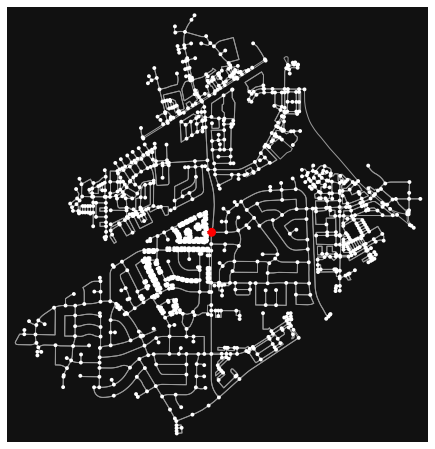

In [34]:
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

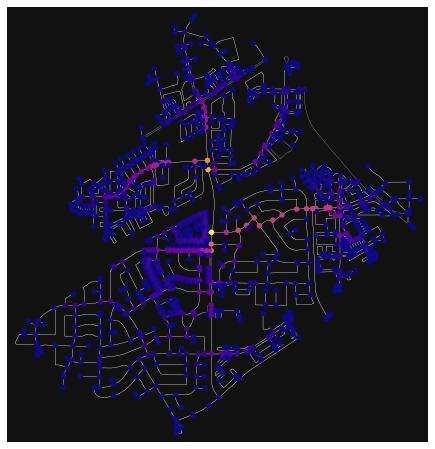

In [35]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

### getting image of place

In [37]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240
dpi = 40

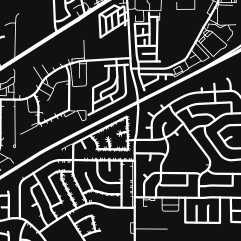

In [40]:
place = "test"
point = (38.573473,-121.319084)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point, filepath=fp, dpi=dpi, save=True, show=False, close=True
)
Image(fp, height=size, width=size)

## building footprint (could be interesting)

In [41]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240

# specify that we're retrieving building footprint geometries
tags = {"building": True}

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


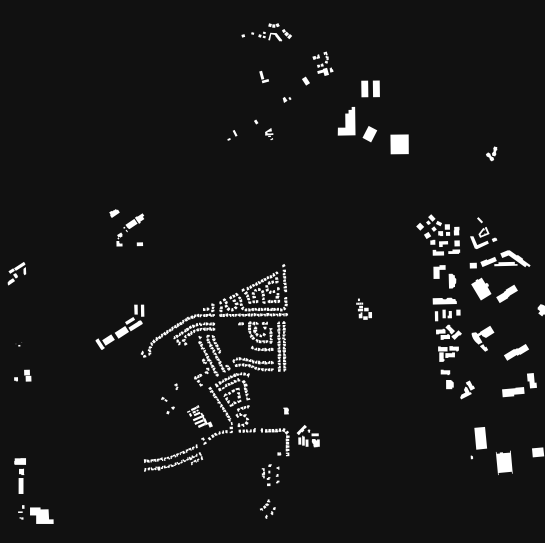

In [48]:
point = (38.573473,-121.319084)
dist = 1500
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./{img_folder}/paris_bldgs.{extension}"
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    color="w",
    filepath=fp,
    dpi=90,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [49]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

C:\Users\psle1\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


element_type  osmid    
node          368171027        0.000000
way           32549580     11250.675235
              32549585      4138.751146
              32549587      9854.375925
              59440045      8323.598222
dtype: float64

In [54]:
# total area (sq m) covered by building footprints
sum(areas)
# ratio of buildings to area projected
print (f'the ratio is {sum(areas)/1500**2}')

the ratio is 0.14360050608175756


## consolidate graph

In [21]:
# get a GeoSeries of consolidated intersections
G_proj = ox.project_graph(G)
ints = ox.consolidate_intersections(G_proj, rebuild_graph=False, tolerance=15, dead_ends=False)
print (f'the original number of intersections is {len(G)}, the new number of intersectiosn is {len(ints)}')


the original number of intersections is 1322, the new number of intersectiosn is 457


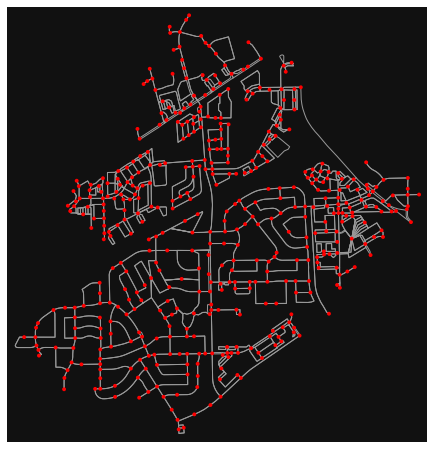

In [22]:
# consolidate intersections and rebuild graph topology
# this reconnects edge geometries to the new consolidated nodes
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
fig, ax = ox.plot_graph(G2, node_color="r")

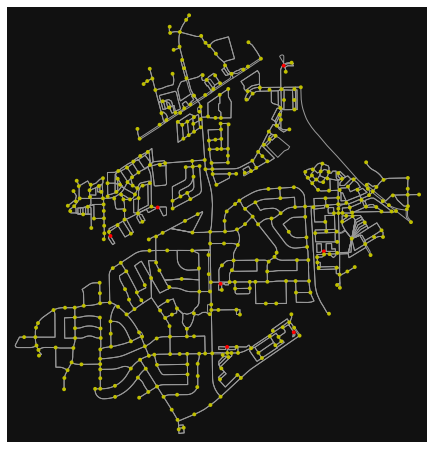

In [23]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G2)]
nc = ["r" if node in loops else "y" for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc)

## Calculate basic street network measures (topological and geometric)

In [ ]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Piedmont, California, USA"))
stats["circuity_avg"]

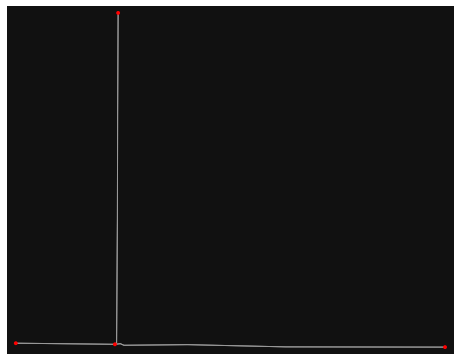

{'n': 4,
 'm': 6,
 'k_avg': 3.0,
 'edge_length_total': 7418.388000000001,
 'edge_length_avg': 1236.3980000000001,
 'streets_per_node_avg': 2.75,
 'streets_per_node_counts': {0: 0, 1: 1, 2: 0, 3: 2, 4: 1},
 'streets_per_node_proportions': {0: 0.0, 1: 0.25, 2: 0.0, 3: 0.5, 4: 0.25},
 'intersection_count': 3,
 'street_length_total': 3709.1940000000004,
 'street_segment_count': 3,
 'street_length_avg': 1236.3980000000001,
 'circuity_avg': 1.0014482438269365,
 'self_loop_proportion': 0.0}

In [22]:
# same point again, but create network only of nodes within 500m along the network from point
sutter = (38.971651, -121.759151)

G = ox.graph_from_point(sutter, dist=2500, dist_type="network", network_type="bike")
fig, ax = ox.plot_graph(G, node_color="r")

## graph of sutter
nodes, edges = ox.graph_to_gdfs(G)

sutter = ox.utils_graph.graph_from_gdfs(nodes, edges)

ox.basic_stats(sutter)